In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

2023-05-14 03:28:43.348557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 03:28:43.575048: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-14 03:28:43.613516: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
%matplotlib inline

In [3]:
data_dir = 'data/outputs'

In [32]:
img_height, img_width = 32*2, 32

# Set the batch size
batch_size = 8

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 1657 files belonging to 2 classes.
Using 1492 files for training.
Found 1657 files belonging to 2 classes.
Using 165 files for validation.


In [34]:
class_names = train_ds.class_names

In [35]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
img_height, img_width

(64, 32)

In [127]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    # tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [129]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [130]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
187/187 [==============================] - 8s 33ms/step - loss: 0.6370 - accuracy: 0.7701 - val_loss: 0.3599 - val_accuracy: 0.8364
Epoch 2/10
187/187 [==============================] - 6s 31ms/step - loss: 0.4176 - accuracy: 0.8237 - val_loss: 0.3753 - val_accuracy: 0.8303
Epoch 3/10
187/187 [==============================] - 6s 30ms/step - loss: 0.4011 - accuracy: 0.8318 - val_loss: 0.3652 - val_accuracy: 0.8545
Epoch 4/10
187/187 [==============================] - 6s 30ms/step - loss: 0.3625 - accuracy: 0.8512 - val_loss: 0.3277 - val_accuracy: 0.8727
Epoch 5/10
187/187 [==============================] - 6s 30ms/step - loss: 0.3626 - accuracy: 0.8519 - val_loss: 0.3450 - val_accuracy: 0.8485
Epoch 6/10
187/187 [==============================] - 6s 32ms/step - loss: 0.3341 - accuracy: 0.8686 - val_loss: 0.3251 - val_accuracy: 0.8788
Epoch 7/10
187/187 [==============================] - 6s 31ms/step - loss: 0.3379 - accuracy: 0.8660 - val_loss: 0.3171 - val_accuracy: 0.8667

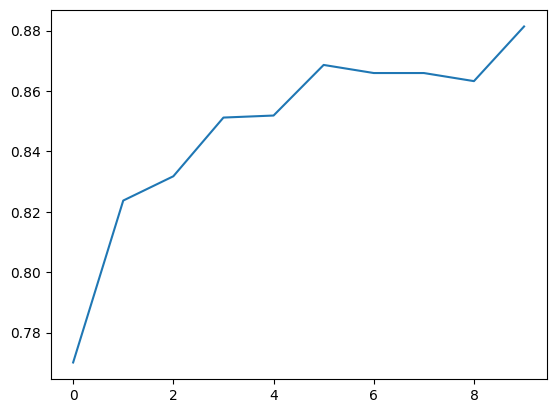

In [131]:
plt.plot(history.history['accuracy'], label='accuracy')

In [132]:
def predict_image_class(image_path, model,thresh = 0.4):
    # Load the saved model

    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(32*2, 32)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    # Make predictions
    predictions = model(img_array)
    predicted_thresh = predictions[0][0].numpy()
    print(predicted_thresh)
    if predicted_thresh < thresh:
        return 'others'
    else:
        return 'zomato'


In [133]:
# test_img_path = "data/outputs/zomato/_119543822_gettyimages-1233975745.jpg_1.jpg"
import os
# pick a random jpg file
other_files = os.listdir("data/outputs/others")
other_files = [f for f in other_files if f.endswith(".jpg")]
other_files = [os.path.join(data_dir,'others', f) for f in other_files]

zomoto_files = os.listdir("data/outputs/zomato")
zomoto_files = [f for f in zomoto_files if f.endswith(".jpg")]
zomoto_files = [os.path.join(data_dir, 'zomato',f) for f in zomoto_files]


In [134]:
# model.save('model/binary_22')

In [138]:

random_file = np.random.choice(zomoto_files)
print(random_file)
predict_image_class(random_file, model,thresh=.22)

data/outputs/zomato/ant-search-and-discovery-appwait-in-line-to-pick-orders-from-shah-gho-RX658W.jpg_0.jpg
0.45893428


'zomato'

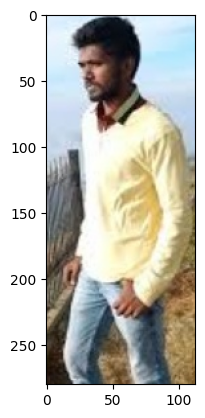

In [123]:
plt.imshow(plt.imread(random_file))